# Project 4 - Advanced Lane Lines

#### Library Import

In [1]:
# Project Libraries
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

### Camera Calibration

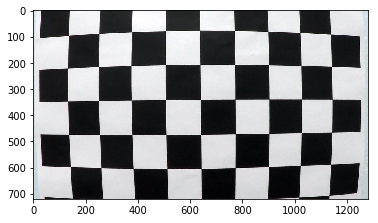

In [2]:
# Load calibration images
filelist = os.listdir('./camera_cal')
images = [cv2.imread('./camera_cal/{}'.format(image)) for image in filelist]
plt.imshow(images[0])
plt.show()

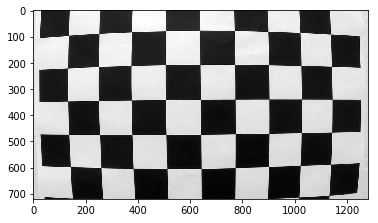

In [3]:
# Convert to gray
gray = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
plt.imshow(gray[0], cmap='gray')
plt.show()

In [4]:
# Find the chessboard corners
nx = 9
ny = 6

# create object point
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object and image points for undistortion
objpoints = []
imgpoints = []

for image in images:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            # Draw corners for checking
#             cv2.drawChessboardCorners(image, (nx,ny), corners, ret)
#             plt.imshow(image)
#             plt.show()

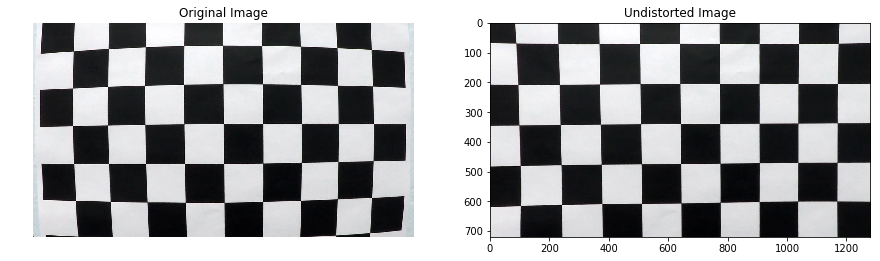

In [31]:
# Use the image and object points to undistort image
test_image = images[0]
image_size = (test_image.shape[1], test_image.shape[0])

# Calibrate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                   imgpoints,image_size,None,None)

dst = cv2.undistort(test_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(dst)
ax2.set_title('Undistorted Image')
ax1.axis('off')
plt.show()

In [ ]:
# Load Test Images from file
filelist = os.listdir('./test_images/')
images = [cv2.imread('./test_images/{}'.format(image)) for image in filelist]

In [ ]:
f, ax = plt.subplots(2,4, figsize=(15,5))
ax = ax.ravel()
f.tight_layout()
for i in range(0,len(ax)):
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.show()